In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
File not found: results/real5_BreastTumor_rhat.csv
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.0648(0.0312)          1.0538(0.0327)      1.1191(0.0548)        1.2392(0.0783)
real2_WineQuality        1.1075(0.0529)          1.1253(0.0476)      1.2179(0.0829)        1.3301(0.1925)
real3_CalHousing         1.6794(0.2307)          1.6388(0.1140)      1.8258(0.0945)        1.9416(0.3818)
real4_Concrete           1.1854(0.1018)          1.3327(0.1708)      1.5941(0.3114)        1.4746(0.1432)
real6_echoMonths         1.0355(0.0181)          1.0541(0.0401)      1.3496(0.1444)        1.5136(0.2187)
real7_Satellite          1.9170(0.2325)          1.7409(0.2060)      2.0485(0.3563)        1.9189(0.4131)
real8_Triazines          1.0032(0.0021)          1.0116(0.0079)      1.0038(0.0025)

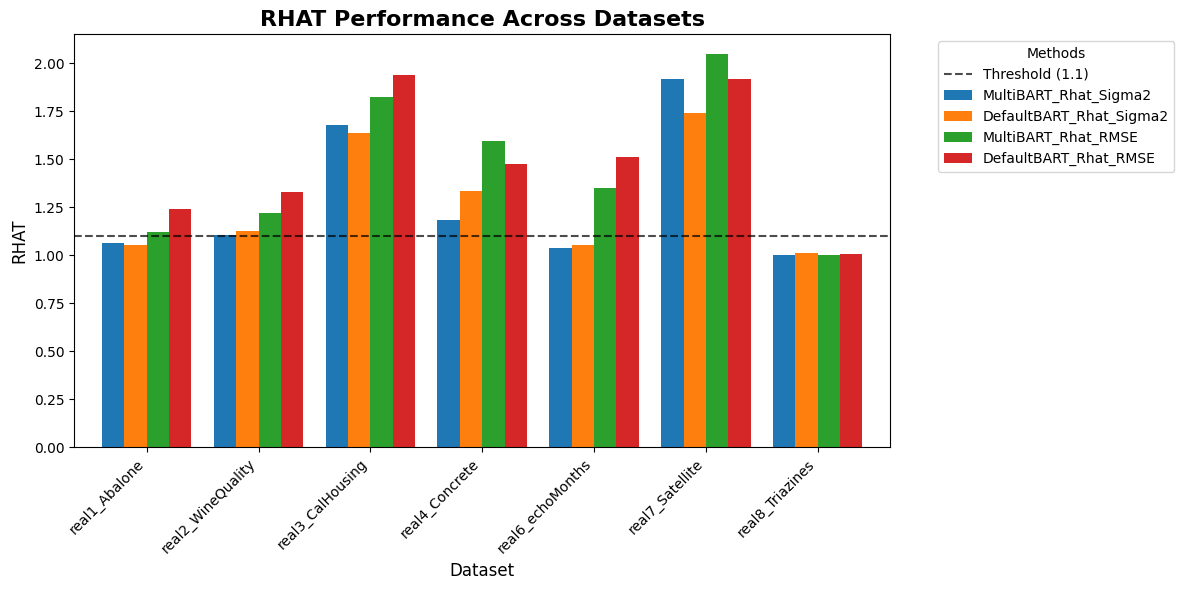


Summary for TEST_MSE
File not found: results/real5_BreastTumor_test_mse.csv
                          bart_mtmh              bart               btz                rf               xgb
Dataset                                                                                                    
real1_Abalone        4.9002(0.3575)    4.9119(0.3510)    4.9266(0.3253)    4.8885(0.2999)    5.5525(0.2770)
real2_WineQuality    0.4670(0.0137)    0.4744(0.0133)    0.4724(0.0127)    0.3712(0.0143)    0.4088(0.0144)
real3_CalHousing     0.2175(0.0048)    0.2256(0.0065)    0.2841(0.0072)    0.2626(0.0091)    0.2224(0.0054)
real4_Concrete      19.2652(2.1386)   20.3332(1.3612)   20.5084(3.3501)   24.7303(2.0920)   19.9925(2.4820)
real6_echoMonths   129.9213(2.0699)  131.5895(2.0706)  131.4804(2.3197)  134.7420(2.5362)  142.6103(2.3368)
real7_Satellite      0.6012(0.0409)    0.6176(0.0322)    0.6233(0.0327)    0.5065(0.0275)    0.5429(0.0314)
real8_Triazines      0.0173(0.0039)    0.0172(0.0039)    0.

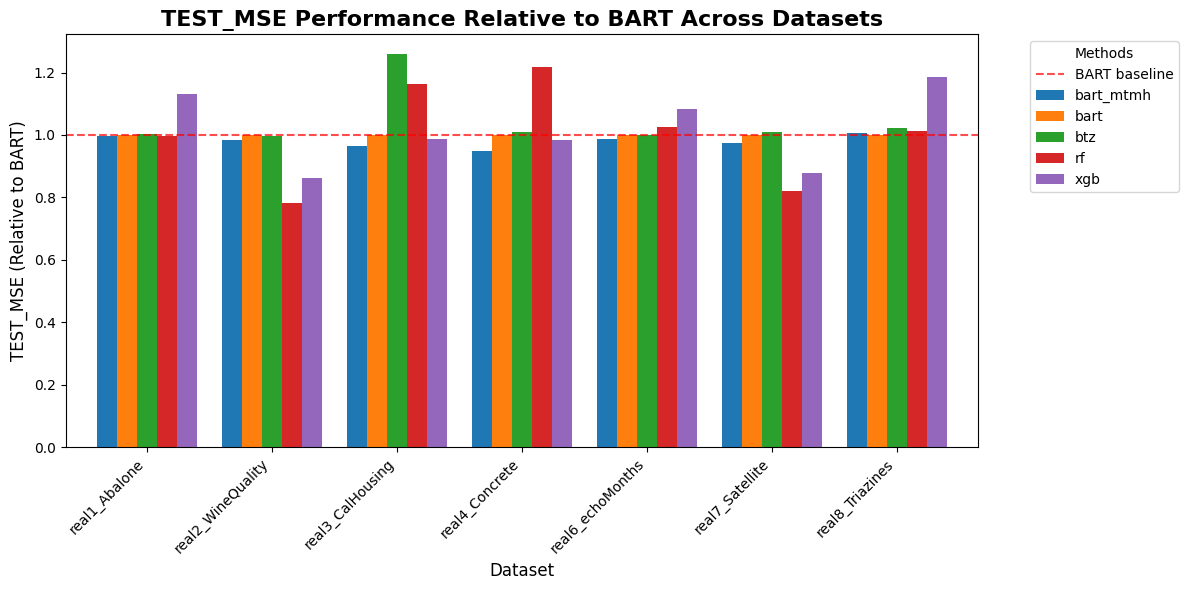


Summary for PI_LENGTH
File not found: results/real5_BreastTumor_pi_length.csv
                         bart_mtmh             bart              btz
Dataset                                                             
real1_Abalone       8.1476(0.1287)   8.1648(0.0843)   8.2890(0.0698)
real2_WineQuality   2.5683(0.0138)   2.5788(0.0130)   2.6603(0.0114)
real3_CalHousing    1.5955(0.0172)   1.7164(0.0120)   2.1632(0.0105)
real4_Concrete     14.5029(0.5889)  14.8389(0.4786)  16.5741(0.3288)
real6_echoMonths   43.9892(0.1701)  44.2697(0.1426)  44.7265(0.0780)
real7_Satellite     2.0542(0.0484)   2.4204(0.0588)   2.8447(0.0559)
real8_Triazines     0.5274(0.0237)   0.5265(0.0216)   0.5204(0.0186)


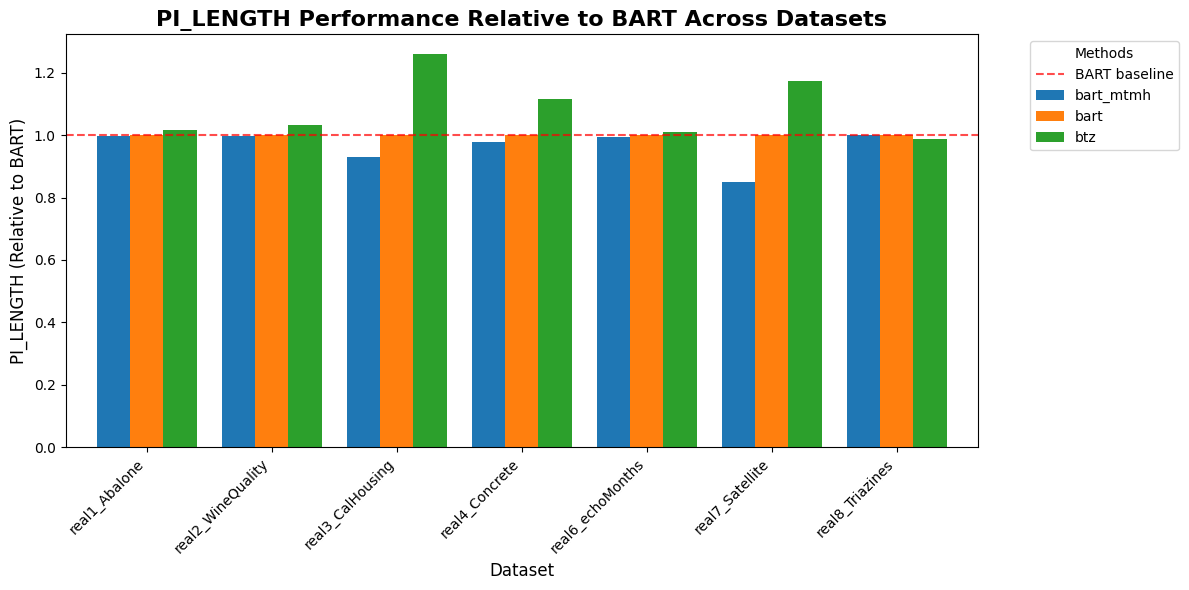


Summary for COVERAGE
File not found: results/real5_BreastTumor_coverage.csv
                        bart_mtmh            bart             btz
Dataset                                                          
real1_Abalone      0.9311(0.0099)  0.9312(0.0093)  0.9327(0.0085)
real2_WineQuality  0.9382(0.0036)  0.9372(0.0053)  0.9428(0.0038)
real3_CalHousing   0.9269(0.0043)  0.9347(0.0039)  0.9484(0.0028)
real4_Concrete     0.9205(0.0170)  0.9186(0.0128)  0.9409(0.0188)
real6_echoMonths   0.9387(0.0030)  0.9397(0.0026)  0.9420(0.0022)
real7_Satellite    0.8675(0.0098)  0.8908(0.0080)  0.9160(0.0057)
real8_Triazines    0.9468(0.0254)  0.9362(0.0279)  0.9362(0.0279)


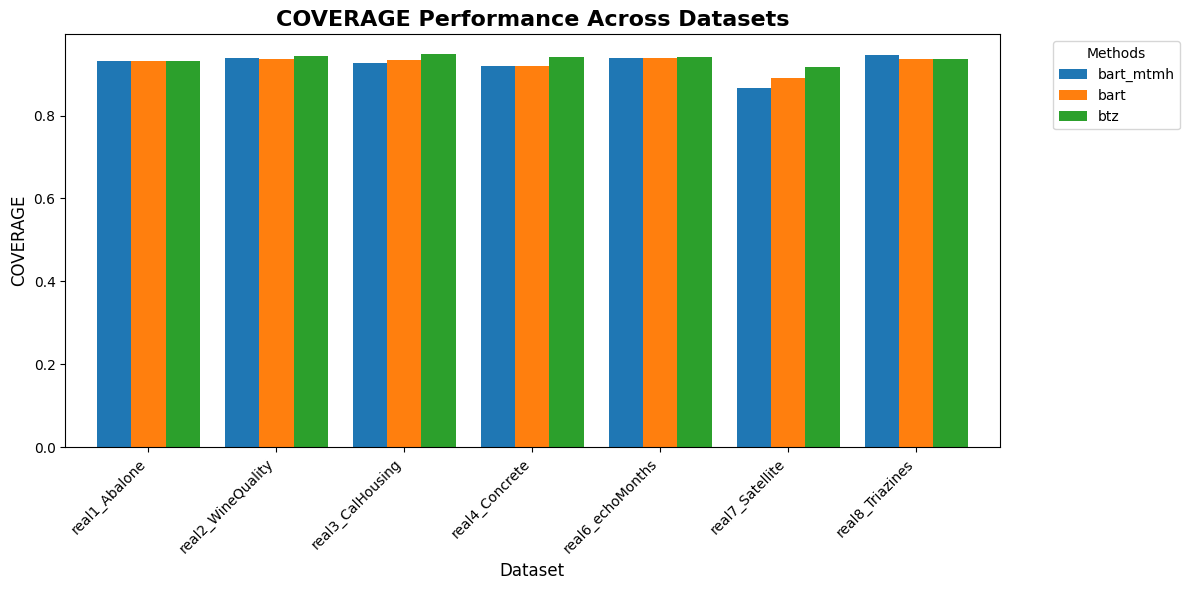


Summary for TRAIN_TIME
File not found: results/real5_BreastTumor_train_time.csv
                          bart_mtmh              bart               btz               rf             xgb
Dataset                                                                                                 
real1_Abalone      231.4382(0.9291)   33.1646(0.2117)   81.8119(1.1687)   2.3513(0.6145)  0.1411(0.0457)
real2_WineQuality  311.9754(2.7639)   44.0216(1.3950)   89.8690(2.1427)   4.4111(1.0326)  0.2883(0.0869)
real3_CalHousing   747.7476(6.3322)   94.1316(4.2319)  151.9023(3.8583)  17.5144(1.4582)  0.3749(0.0401)
real4_Concrete     152.6613(0.6494)   22.9370(0.1762)   66.2254(0.5853)   0.5206(0.0737)  0.1512(0.0208)
real6_echoMonths   606.0471(4.8462)   87.8376(4.0193)  143.9981(2.8007)  14.0491(1.2366)  0.3084(0.0185)
real7_Satellite    399.6967(6.0875)  63.0596(19.8273)  62.2243(13.2107)   9.2759(2.2008)  0.3827(0.0839)
real8_Triazines    117.2149(0.8389)   18.9261(0.2856)   60.8290(0.9785)   0.344

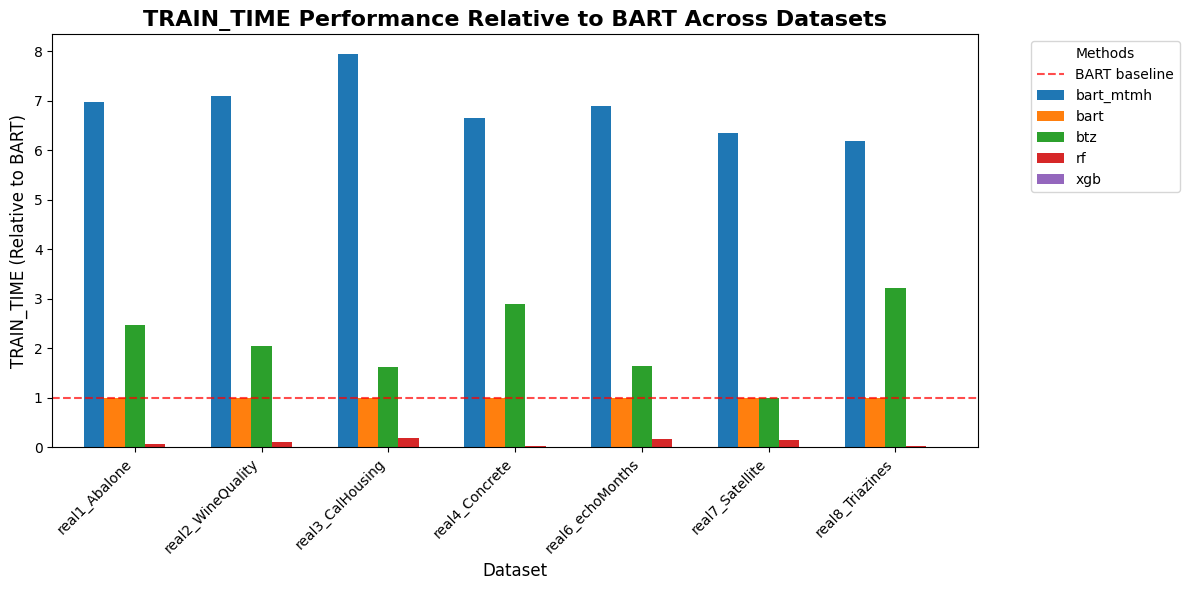

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

File not found: results/real5_BreastTumor_tries.csv


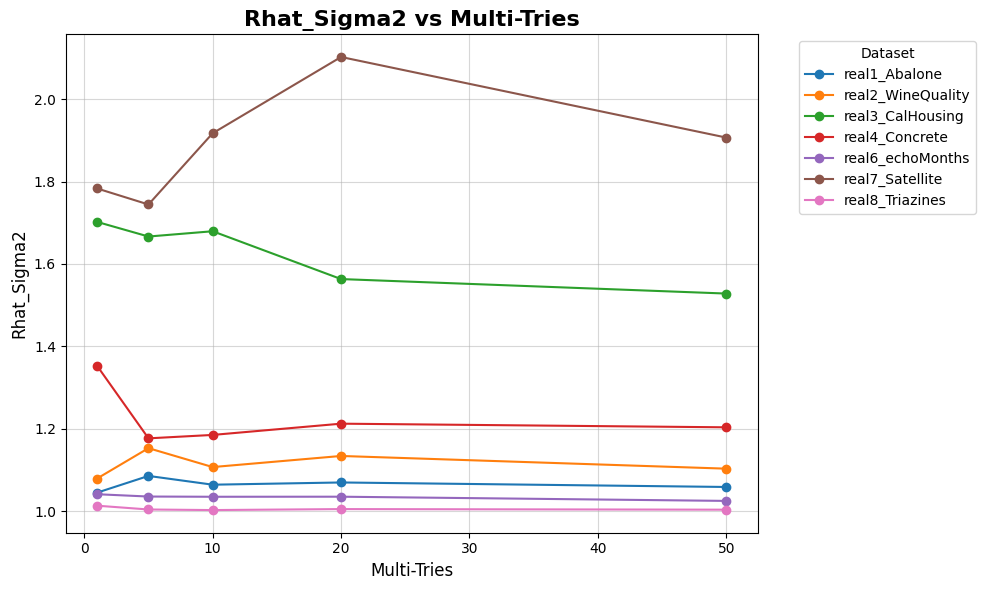

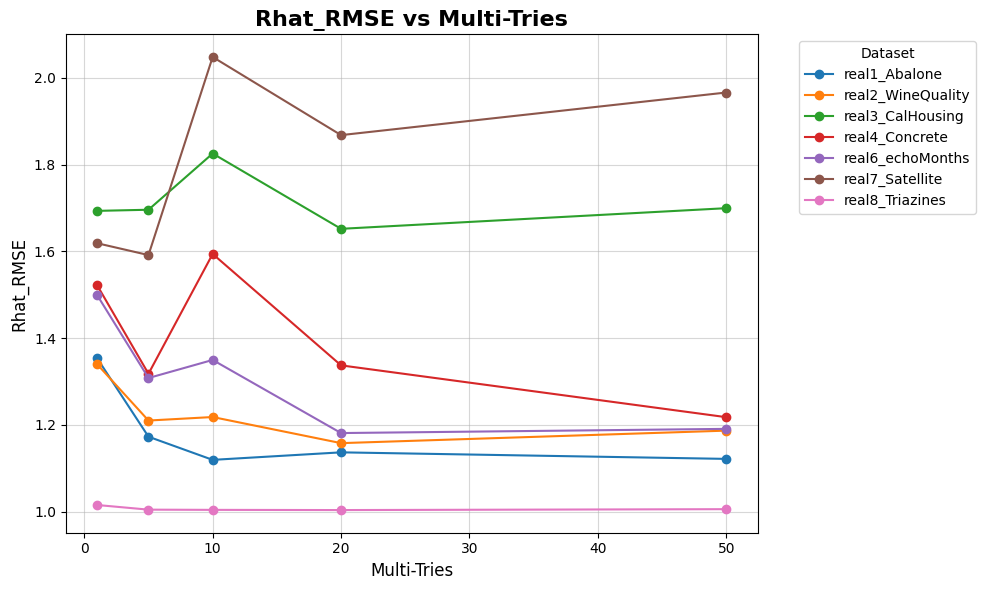

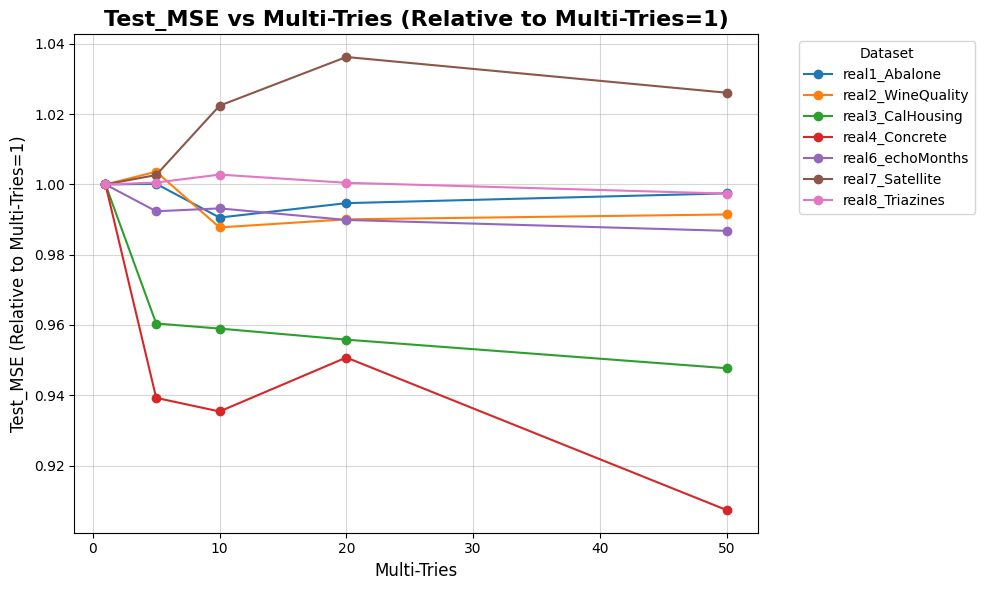

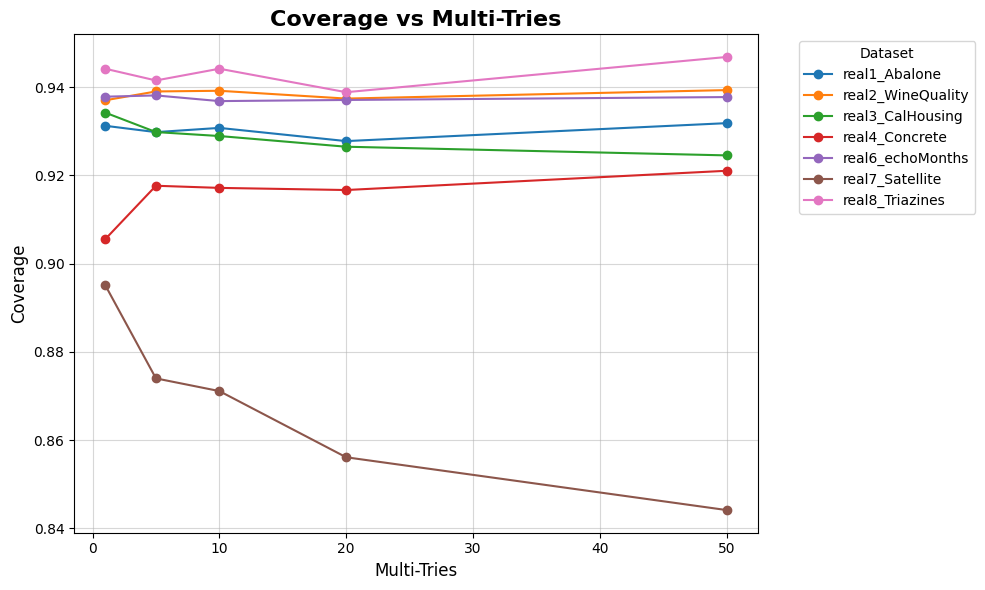

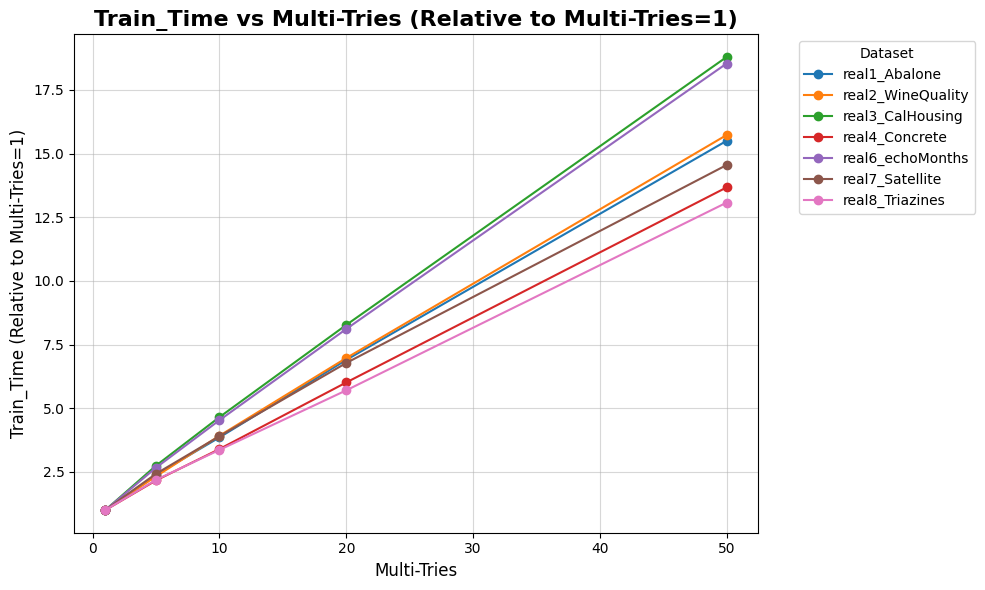

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()